# Preprocessing and Modeling (Brain Tumor Classification)

## Step 1: Importing Libraries

In [1]:
import time
import os, sys, os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import itertools

## Step 2: Generating the training, test, and validation dataset

In [2]:
# Generating Dataset using ImageDataGenerator
# Using Resized and Cleaned Dataset
# From "../BrainTumorDataClean/" directory

#train = ImageDataGenerator(rescale=1/255)
#test = ImageDataGenerator(rescale=1/255)
#validation = ImageDataGenerator(rescale=1/255)

train = ImageDataGenerator(rescale=1/255, horizontal_flip=True)

test = ImageDataGenerator(rescale=1/255, horizontal_flip=True) 

validation = ImageDataGenerator(rescale=1/255, horizontal_flip=True)


train_dataset = train.flow_from_directory("../BrainTumorDataClean/Training",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'categorical', color_mode="grayscale")

validation_dataset = validation.flow_from_directory("../BrainTumorDataClean/Validation",
                                          target_size=(128,128),
                                          batch_size =32,
                                          class_mode = 'categorical', color_mode="grayscale")

test_dataset = test.flow_from_directory("../BrainTumorDataClean/Testing",
                                          target_size=(128,128),
                                          batch_size =32,
                                          class_mode = 'categorical', color_mode="grayscale")


Found 4923 images belonging to 4 classes.
Found 1050 images belonging to 4 classes.
Found 1050 images belonging to 4 classes.


In [3]:
train_dataset.class_indices

{'Glioma': 0, 'Meningioma': 1, 'NoTumor': 2, 'Pituitary': 3}

In [4]:
validation_dataset.class_indices

{'Glioma': 0, 'Meningioma': 1, 'NoTumor': 2, 'Pituitary': 3}

In [5]:
test_dataset.class_indices

{'Glioma': 0, 'Meningioma': 1, 'NoTumor': 2, 'Pituitary': 3}

In [6]:
train_dataset.labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
img, label =next(test_dataset)
np.argmax(label[:10], axis=-1)
#for i, j in zip(img, label):
#     print(i, j)

array([2, 3, 1, 2, 0, 1, 2, 1, 2, 0], dtype=int64)

In [8]:
# type(train_dataset)

## Step 3: Modeling

### Model 1 - Implementing a Simple Neural Network using  dense layers

In [10]:
# Specify the Simple model using Dense Layer [optimizer = 'adam']

model1 = Sequential()

model1.add(Flatten(input_shape=(128,128,1)))

model1.add(Dense(512, activation='relu'))

model1.add(Dense(256, activation='relu'))

model1.add(Dense(128, activation='relu'))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(32, activation='relu'))

model1.add(Dense(16, activation='relu'))

model1.add(Dense(4, activation='softmax'))

In [11]:
# Compile the model with learning_rate=0.001
early_stopping_monitor1 = EarlyStopping(patience=4)
model1.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Fit the model
history1 = model1.fit(train_dataset, epochs = 20, batch_size=32, \
                      validation_data = validation_dataset, callbacks=[early_stopping_monitor1])

Epoch 1/20
154/154 [==============================] - 14s 83ms/step - loss: 1.0381 - accuracy: 0.5168 - val_loss: 0.8471 - val_accuracy: 0.6457
Epoch 2/20
154/154 [==============================] - 11s 73ms/step - loss: 0.7468 - accuracy: 0.6778 - val_loss: 0.7896 - val_accuracy: 0.6952
Epoch 3/20
154/154 [==============================] - 12s 75ms/step - loss: 0.6465 - accuracy: 0.7280 - val_loss: 0.7004 - val_accuracy: 0.7286
Epoch 4/20
154/154 [==============================] - 12s 78ms/step - loss: 0.5755 - accuracy: 0.7634 - val_loss: 0.5844 - val_accuracy: 0.7733
Epoch 5/20
154/154 [==============================] - 12s 79ms/step - loss: 0.4973 - accuracy: 0.7981 - val_loss: 0.5340 - val_accuracy: 0.7933
Epoch 6/20
154/154 [==============================] - 12s 79ms/step - loss: 0.4593 - accuracy: 0.8135 - val_loss: 0.6435 - val_accuracy: 0.7914
Epoch 7/20
154/154 [==============================] - 11s 71ms/step - loss: 0.4073 - accuracy: 0.8395 - val_loss: 0.4695 - val_accuracy:

In [13]:
model1.evaluate(test_dataset)

33/33 [==============================] - 1s 16ms/step - loss: 0.2600 - accuracy: 0.9257


[0.25996923446655273, 0.9257143139839172]

In [14]:
predictions1 = model1.predict(test_dataset)

In [15]:
type(predictions1)

numpy.ndarray

In [16]:
predictions1.shape

(1050, 4)

In [17]:
predictions1[:10]

array([[4.11055261e-08, 8.93206219e-04, 1.54247864e-05, 9.99091268e-01],
       [9.99260128e-01, 4.57582733e-04, 5.59456612e-06, 2.76698731e-04],
       [2.49504298e-02, 7.24840283e-01, 2.43843362e-01, 6.36591762e-03],
       [4.27698083e-02, 9.56896901e-01, 2.86643801e-04, 4.66278652e-05],
       [9.18086112e-01, 8.16188753e-02, 6.31110452e-05, 2.31876838e-04],
       [5.31767844e-04, 3.01285461e-02, 9.68604147e-01, 7.35535868e-04],
       [2.99326796e-02, 2.95317978e-01, 1.22391477e-01, 5.52357852e-01],
       [9.94538486e-01, 4.66905348e-03, 1.84596851e-04, 6.07838971e-04],
       [1.43615844e-05, 6.66349847e-03, 9.93300676e-01, 2.14918164e-05],
       [1.02169015e-01, 8.97666395e-01, 1.43301455e-04, 2.13151616e-05]],
      dtype=float32)

In [18]:
pred_labels = np.argmax(predictions1, axis=-1)

In [24]:
pred_labels[:500]

array([3, 0, 1, 1, 0, 2, 3, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 3,
       0, 1, 3, 3, 0, 2, 2, 2, 3, 3, 0, 3, 0, 3, 2, 0, 1, 2, 3, 2, 1, 3,
       1, 1, 2, 1, 3, 0, 0, 3, 2, 2, 2, 3, 2, 3, 0, 2, 3, 0, 1, 0, 2, 3,
       0, 3, 2, 0, 3, 1, 3, 3, 1, 1, 0, 2, 3, 2, 0, 2, 1, 3, 3, 1, 1, 2,
       2, 3, 3, 0, 1, 1, 1, 2, 3, 3, 2, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 2,
       0, 0, 1, 2, 1, 2, 3, 1, 2, 2, 0, 3, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2,
       2, 3, 1, 1, 1, 1, 2, 1, 0, 0, 3, 0, 3, 0, 2, 0, 3, 1, 1, 2, 0, 2,
       3, 2, 2, 1, 0, 2, 0, 0, 2, 2, 3, 0, 2, 2, 1, 0, 2, 2, 3, 0, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 0, 2, 0, 1, 2, 3, 2, 2, 2, 1, 2, 1, 3,
       2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 3, 0, 1, 1, 2, 1, 3,
       3, 2, 1, 3, 0, 3, 0, 0, 0, 0, 2, 3, 2, 2, 0, 2, 2, 1, 1, 3, 0, 0,
       2, 0, 2, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0,
       3, 0, 2, 1, 0, 2, 2, 3, 3, 2, 0, 3, 0, 0, 2, 2, 1, 2, 2, 2, 2, 3,
       2, 3, 1, 1, 2, 2, 0, 3, 3, 0, 1, 2, 1, 1, 1,

In [20]:
true_labels = test_dataset.labels

In [ ]:
true_labels = np.argmax(test_dataset.labels, axis=-1)

In [23]:
true_labels[:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Model 2 (Implementing a Simple Convolutional Neural Network Model Architecture)

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(128,128,1)))
model2.add(MaxPool2D(pool_size=(2, 2), strides=2))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2, 2), strides=2))

model2.add(Flatten())

model2.add(Dense(units=4, activation='softmax'))

In [ ]:
early_stopping_monitor2 = EarlyStopping(patience=4)
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(train_dataset, steps_per_epoch=4923//32, validation_data=validation_dataset,\
           validation_steps=len(validation_dataset)//32, epochs=20, callbacks = [early_stopping_monitor2])

In [ ]:
model2.evaluate(test_dataset)

In [ ]:
predictions2 =model2.predict(test_dataset)

### Model 3 ()

In [ ]:
# Defining Historical LeNet-5 Architecture
model3 = Sequential()

model3.add(Conv2D(20, (5,5), activation='relu', padding = 'same', strides=1, input_shape = (128,128,1)))
model3.add(MaxPool2D((2,2), strides=2))

model3.add(Conv2D(50, (5,5), activation='relu', strides=1, padding = 'same'))
model3.add(MaxPool2D((2,2), strides=2))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))

model3.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
early_stopping_monitor = EarlyStopping(patience=4)
model3.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
model3.fit(train_dataset, epochs = 20, batch_size=10, \
                      validation_data = validation_dataset, callbacks=[early_stopping_monitor])

In [ ]:
model3.evaluate(test_dataset)

In [ ]:
predictions3 = model3.predict(test_dataset)

### Model 4

In [ ]:
# 96.95%

model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(32,(3,3), input_shape=(128,128,1), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model4.add(Conv2D(32,(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

# Neural network

model4.add(Dense(units= 252, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(units=252, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(units=4, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])
early_stopping_monitor = EarlyStopping(patience=4)

In [ ]:
history4 = model6.fit(train_dataset, steps_per_epoch=4923//32, epochs=20, validation_data=validation_dataset, validation_steps= 1050//32,
                     callbacks=[early_stopping_monitor])

In [ ]:
model4.evaluate(test_dataset)

In [ ]:
predictions4 = model4.predict(test_dataset)

### Model 5 Implementing complex CNN Model

In [ ]:
# Specifying Model Architecture (Convolutional Neural Network)
model5 = Sequential()

# Convolutional layer, Batch Normalization layer, and maxpool layer 1
model5.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 2
model5.add(Conv2D(64,(3,3),activation='relu'))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 3
model5.add(Conv2D(128,(3,3),activation='relu'))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# Convolutional layer,  Batch Normalization layer, and maxpool layer 4
model5.add(Conv2D(256,(3,3),activation='relu'))
# model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model5.add(Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model5.add(Dense(512,activation='relu'))
# model5.add(Dropout(0.25))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model5.add(Dense(4,activation='softmax'))

In [ ]:
early_stopping_monitor = EarlyStopping(patience=4)
model5.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#steps_per_epoch = train_imagesize/batch_size

model5.fit(train_dataset, epochs = 20, batch_size=32, validation_data = validation_dataset, \
           callbacks = [early_stopping_monitor])

In [ ]:
model5.evaluate(test_dataset)

In [ ]:
predictions5 = model5.predict(test_dataset)

In [ ]:
pred = np.argmax(predictions5)

### Model 6

In [ ]:
model6 = Sequential()

# Convolutional layer 1
model6.add(Conv2D(64,(7,7), input_shape=(128,128, 1), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model6.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model6.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model6.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))


model6.add(Flatten())

# Full connect layers

model6.add(Dense(units= 512, activation='relu'))
model6.add(Dropout(0.2))

model6.add(Dense(units=512, activation='relu'))
model6.add(Dropout(0.2))

model6.add(Dense(units=4, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model6.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])
early_stopping_monitor = EarlyStopping(patience=4)

In [ ]:
history6 = model6.fit(train_dataset, steps_per_epoch=4923//32, epochs=20, validation_data=validation_dataset, validation_steps= 1050//32,
                     callbacks=[early_stopping_monitor])

In [ ]:
model5.evaluate(test_dataset)

In [ ]:
predictions5 =model5.predict(test_dataset)

## Visualizing Models Performance

train_dataset, validation_dataset, test_dataset
model1, history1, predictions1

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
y_pred = np.argmax(predictions2, axis=-1)
y_true = test_dataset.labels

In [ ]:
# y_pred.shape
y_pred[:20]

In [ ]:
# y_true.shape
y_true[:20]

In [ ]:
print(classification_report(y_true,y_pred))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_true,Y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
# Create the plot
# type(history1)
# history1.history.items()
plt.plot(history1.history['loss'], 'b', label='training loss')
plt.plot(history1.history['val_loss'], 'r', label='validation loss')
plt.xlabel('Epochs', )
plt.ylabel('Validation score')
plt.legend()
plt.show()

In [27]:
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions1, axis=-1))
cm_plot_labels = ['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 58  51  74  58]
 [ 49  52  95  49]
 [ 77  62 106  80]
 [ 44  53  83  59]]


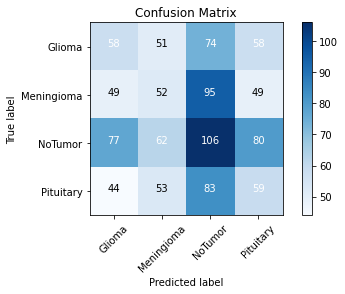

In [29]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# https://github.com/keras-team/keras/issues/2607
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
# labels = ['Glioma','Meningioma','NoTumor','Pituitary']
def get_all_metrics(y_true, y_pred, model_num, history):
    """
    Confusion matrix and model performance metric visualization
    """
    y_true = np.argmax(y_true, axis=-1)
    y_pred = np.argmax(y_pred, axis=-1)
    
    print(f"\nMax. training accuracy for {model_num}: {max(history1.history['accuracy'])*100:.2f}%")
    print(f"Max. validation accuracy for {model_num}: {max(history1.history['val_accuracy'])*100:.2f}%")
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    print(f"Test accuracy for {model_num}: {(accuracy*100):.2f}%")
    
    print(f"\nClassification Report for {model_num}:\n\n", classification_report(y_true, y_pred))
    
    fig,ax = plt.subplots(figsize=(16,8))
    sns.heatmap(confusion_matrix(y_true, y_pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap="Greens",alpha=0.7,linewidths=2,linecolor='gray',fmt='d')
    fig.text(s=f'      Confusion Matrix for {model_num}',size=18,fontweight='bold',
            fontname='monospace',color='g',y=0.92,x=0.28,alpha=0.7)
    plt.show()

In [ ]:
get_all_metrics(y_test, y_pred1, 'model_1', history1)

## Save a Model

In [ ]:
# serialize model to JSON
from keras.models import model_from_json
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

## For later use

In [ ]:
# Data Preparation for keras nodel
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/kaggle/input/brain-tumor-classification-mri/Training/')
path_test = ('/kaggle/input/brain-tumor-classification-mri/Testing/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        
train_img = (np.array(train_img))
test_img = (np.array(test_img))
train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [ ]:
"""

#steps_per_epoch = train_imagesize/batch_size
result = 0
model_evaluate = []
start = time.time()
for i in range(5):
    model.fit(train_dataset,
             epochs = 10, batch_size=10,
             validation_data = 0.0  
             )
    result = model.evaluate(test_dataset)
    model_evaluate.append(result[1])
end = time.time()
print(end - start)

"""

In [ ]:
# Early Stopping
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
"""
RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)
Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)

"""

In [ ]:
image_size = 300
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
import visualkeras

model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

In [ ]:
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [ ]:
# https://pypi.org/project/visualkeras/

In [ ]:
# load json and create model
'''
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
'''

In [ ]:
# load weights into new model
'''
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
'''

In [ ]:
'''
# Individual predictions
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/OIP.jpg', target_size = (512, 512)) # Cargamos la imagen con un tamaño igual a
                                                                                           # los anteriores
test_image = image.img_to_array(test_image) # Convertimos la imagen en un array
test_image = np.expand_dims(test_image, axis = 0) # Modificamos las dimensions
result = classifier.predict(test_image) # Prediccion
print(training_dataset.class_indices)
print(result)
'''

In [ ]:
# evaluate loaded model on test data
'''
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
'''

Summary 1: horizontalflip=True, (64,64)
model 1=0.88 , model2=0.9419, model3=0.9695, model4=0.9771, model5=0.9629, model6=0.9695
Summary 2: (64,64)
model 1=0.8990 , model2=0.9333, model3=0.9600, model4=0.9610, model5=, model6=0.9533
Summary 3: horizontalflip=True, (128,128)
model 1=0.84 , model2=0.9162, model3=0.9790, model4=0.9657, model5=, model6=0.9552
Summary 4: (128,128)
model 1=0.92 , model2=0.9467, model3=0.9638, model4=0.8971, model5=, model6=0.9457